<a href="https://colab.research.google.com/github/pd2f/FIAP4IA/blob/master/python_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analise de Dados em Python com Pandas

**Objetivo:** Trabalho para Avaliação Total da Disciplina programando IA com Python

**Autor:** Paulo Daniel Ferreira Franco (RM: 332686)

**Ministrada por:** Rafael Novello

**1) Leitura do arquivo lemonades.csv usando pandas**


In [0]:
from pandas import Series, DataFrame
import numpy as np

import pandas as pd
from sklearn.linear_model import LinearRegression


In [0]:
df = pd.read_csv("https://raw.githubusercontent.com/pd2f/python/master/Lemonade2016.csv")

**2) Informações sobre as colunas e as principais estatísticas sobre o dataset**


In [37]:
df.head(2)

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price
0,7/1/2016,Park,97,67,70,90.0,0.25
1,7/2/2016,Park,98,67,72,90.0,0.25


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 7 columns):
Date           31 non-null object
Location       32 non-null object
Lemon          32 non-null int64
Orange         32 non-null int64
Temperature    32 non-null int64
Leaflets       31 non-null float64
Price          32 non-null float64
dtypes: float64(2), int64(3), object(2)
memory usage: 1.8+ KB


**3) Limpeza do dataset**

O dataset apresenta dados null ou "nan" para duas variáveis "Date" e "Leaflets", pois possuem apenas 31 elementos não nulos cada. Por se tratar de um dataset com dados diários correspondente ao mês de julho de 2016,  podemos dizer que existe resultados duplicados para um dos dias. 

In [39]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 0 to 31
Data columns (total 7 columns):
Date           30 non-null object
Location       31 non-null object
Lemon          31 non-null int64
Orange         31 non-null int64
Temperature    31 non-null int64
Leaflets       30 non-null float64
Price          31 non-null float64
dtypes: float64(2), int64(3), object(2)
memory usage: 1.9+ KB


Ainda falta valor para 'Date'. Vou trabalhar com campo do tipo datetime para garantir integridade e correção da base de dados.

In [40]:
df

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price
0,7/1/2016,Park,97,67,70,90.0,0.25
1,7/2/2016,Park,98,67,72,90.0,0.25
2,7/3/2016,Park,110,77,71,104.0,0.25
3,7/4/2016,Beach,134,99,76,98.0,0.25
4,7/5/2016,Beach,159,118,78,135.0,0.25
5,7/6/2016,Beach,103,69,82,90.0,0.25
7,7/7/2016,Beach,143,101,81,135.0,0.25
8,NaN,Beach,123,86,82,113.0,0.25
9,7/9/2016,Beach,134,95,80,126.0,0.25
10,7/10/2016,Beach,140,98,82,131.0,0.25


In [41]:
import datetime as dt
import calendar as cal

s = df['Date'][df['Date'].notna()].apply(lambda dat : dt.date(int(dat.split("/")[2]),
                                                          int(dat.split("/")[0]), int(dat.split("/")[1])))
df.Date.update(s)
df.reset_index(inplace=True)

def identifica_data(ano,mes,data):
  calend = []
  c = cal.Calendar()
  calendario = c.itermonthdates(ano,mes)
  for dia in calendario:
    if(dia.month == mes):
      calend.append(dia)
  mes = pd.Series(calend)
  return pd.Series((mes[mes.isin(data)==False]))

df.Date.update(identifica_data(2016,7,s))
print(identifica_data(2016,7,s))

7    2016-07-08
dtype: object


Faltava o preenchimento da data 08/07/2018. Promovido o preenchimento de dados faltante.

In [42]:
df

,index,Date,Location,Lemon,Orange,Temperature,Leaflets,Price
0,0,2016-07-01,Park,97,67,70,90.0,0.25
1,1,2016-07-02,Park,98,67,72,90.0,0.25
2,2,2016-07-03,Park,110,77,71,104.0,0.25
3,3,2016-07-04,Beach,134,99,76,98.0,0.25
4,4,2016-07-05,Beach,159,118,78,135.0,0.25
5,5,2016-07-06,Beach,103,69,82,90.0,0.25
6,7,2016-07-07,Beach,143,101,81,135.0,0.25
7,8,2016-07-08,Beach,123,86,82,113.0,0.25
8,9,2016-07-09,Beach,134,95,80,126.0,0.25
9,10,2016-07-10,Beach,140,98,82,131.0,0.25


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 8 columns):
index          31 non-null int64
Date           31 non-null object
Location       31 non-null object
Lemon          31 non-null int64
Orange         31 non-null int64
Temperature    31 non-null int64
Leaflets       30 non-null float64
Price          31 non-null float64
dtypes: float64(2), int64(4), object(2)
memory usage: 2.0+ KB


In [0]:
df['Leaflets'].fillna(df['Leaflets'].median(),inplace=True)

Para corrigir a falta de valor de folhetos para um dos dias vou considerar a quantidade média de folhetos distribuidas ao longo do mês (mediana).

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 8 columns):
index          31 non-null int64
Date           31 non-null object
Location       31 non-null object
Lemon          31 non-null int64
Orange         31 non-null int64
Temperature    31 non-null int64
Leaflets       31 non-null float64
Price          31 non-null float64
dtypes: float64(2), int64(4), object(2)
memory usage: 2.0+ KB


Agora as variáveis apresentam uniformidade.


**4) Adicionando coluna "Sales" correspondente ao total de vendas de limão e laranja**

In [46]:
df['Sales'] = df.Lemon + df.Orange
df


,index,Date,Location,Lemon,Orange,Temperature,Leaflets,Price,Sales
0,0,2016-07-01,Park,97,67,70,90.0,0.25,164
1,1,2016-07-02,Park,98,67,72,90.0,0.25,165
2,2,2016-07-03,Park,110,77,71,104.0,0.25,187
3,3,2016-07-04,Beach,134,99,76,98.0,0.25,233
4,4,2016-07-05,Beach,159,118,78,135.0,0.25,277
5,5,2016-07-06,Beach,103,69,82,90.0,0.25,172
6,7,2016-07-07,Beach,143,101,81,135.0,0.25,244
7,8,2016-07-08,Beach,123,86,82,113.0,0.25,209
8,9,2016-07-09,Beach,134,95,80,126.0,0.25,229
9,10,2016-07-10,Beach,140,98,82,131.0,0.25,238


**5) Adicionando coluna chamada "Revenue" que calcula a féria (venda*preço)**

In [0]:
df['Revenue'] = df.Sales*df.Price

 **6) A féria total**

In [48]:
df.Revenue.sum()

2138.0

**7) Função recebe dois parâmetros, o dataset e indicador de temperatura. Quando o indicador informado for  1, a função retornará a máxima temperatura observada no conjunto de dados; se 0, retorna a média do período observado; se -1, retornará a temperatura mínima.**


In [49]:
def temperatura(dataset,temp):
  try:
    if temp == 1:
      return dataset.Temperature.max()
    elif temp == -1:
      return dataset.Temperature.min()
    elif temp == 0:
      return dataset.Temperature.mean()
    else:
      raise ValueError('Parametro "temp" INVÁLIDO')
  except Exception:
      raise ValueError('Parametro INVÁLIDO')
print("Temperatura máxima observada:",temperatura(df,1))
print("Temperatura média observada:",temperatura(df,0))
print("Temperatura mínima observada:",temperatura(df,-1))  
  

Temperatura máxima observada: 84
Temperatura média observada: 78.87096774193549
Temperatura mínima observada: 70


**8) A função recebe dois parametros (dataset e localização). Retorna o dataset
com o preço do limão e laranja ajustados em 15% se a localização for 'Park' ou ajustados em
10% se a localização for 'Beach'**

In [0]:
#@title Função de reajuste

def ajuste_preco_local(dataset,local):
  ds = pd.DataFrame(dataset,copy=True)
  reajuste = 1
  try:
    if "Park" == local:
      reajuste = 1.15
    elif "Beach" == local:
      reajuste = 1.1
    else:
      raise ValueError('Parametro "temp" INVÁLIDO')
  except Exception:
    raise ValueError('Parametro INVÁLIDO')
  finally:
    ds.Price.update(ds[ds.Location == local].Price * reajuste)

  return ds

In [51]:
#@title Usando função com reajuste Beach
ajuste_preco_local(df,'Beach')

,index,Date,Location,Lemon,Orange,Temperature,Leaflets,Price,Sales,Revenue
0,0,2016-07-01,Park,97,67,70,90.0,0.250,164,41.00
1,1,2016-07-02,Park,98,67,72,90.0,0.250,165,41.25
2,2,2016-07-03,Park,110,77,71,104.0,0.250,187,46.75
3,3,2016-07-04,Beach,134,99,76,98.0,0.275,233,58.25
4,4,2016-07-05,Beach,159,118,78,135.0,0.275,277,69.25
5,5,2016-07-06,Beach,103,69,82,90.0,0.275,172,43.00
6,7,2016-07-07,Beach,143,101,81,135.0,0.275,244,61.00
7,8,2016-07-08,Beach,123,86,82,113.0,0.275,209,52.25
8,9,2016-07-09,Beach,134,95,80,126.0,0.275,229,57.25
9,10,2016-07-10,Beach,140,98,82,131.0,0.275,238,59.50


In [52]:
#@title Usando função com reajuste Park
ajuste_preco_local(df,'Park')

,index,Date,Location,Lemon,Orange,Temperature,Leaflets,Price,Sales,Revenue
0,0,2016-07-01,Park,97,67,70,90.0,0.2875,164,41.00
1,1,2016-07-02,Park,98,67,72,90.0,0.2875,165,41.25
2,2,2016-07-03,Park,110,77,71,104.0,0.2875,187,46.75
3,3,2016-07-04,Beach,134,99,76,98.0,0.2500,233,58.25
4,4,2016-07-05,Beach,159,118,78,135.0,0.2500,277,69.25
5,5,2016-07-06,Beach,103,69,82,90.0,0.2500,172,43.00
6,7,2016-07-07,Beach,143,101,81,135.0,0.2500,244,61.00
7,8,2016-07-08,Beach,123,86,82,113.0,0.2500,209,52.25
8,9,2016-07-09,Beach,134,95,80,126.0,0.2500,229,57.25
9,10,2016-07-10,Beach,140,98,82,131.0,0.2500,238,59.50


**9) A função recebe o dataset com parâmetro e retorna o dataset com uma
coluna a mais e mostra o rank de temperatura. O dataset retornado está ordenado
de acordo com rank**

In [53]:
def ranking_temperatura(dataset):
  dts = DataFrame(dataset, copy=True)
  dts['rank'] = dts['Temperature'].rank(ascending=True,pct=True)
  return dts.sort_values(by='rank', ascending=False)

d = ranking_temperatura(df)

d

,index,Date,Location,Lemon,Orange,Temperature,Leaflets,Price,Sales,Revenue,rank
24,25,2016-07-25,Park,156,113,84,135.0,0.50,269,134.50,0.983871
11,12,2016-07-12,Beach,130,95,84,99.0,0.25,225,56.25,0.983871
25,26,2016-07-26,Park,176,129,83,158.0,0.35,305,106.75,0.919355
10,11,2016-07-11,Beach,162,120,83,135.0,0.25,282,70.50,0.919355
9,10,2016-07-10,Beach,140,98,82,131.0,0.25,238,59.50,0.774194
23,24,2016-07-24,Park,121,82,82,117.0,0.50,203,101.50,0.774194
27,28,2016-07-28,Park,96,63,82,90.0,0.35,159,55.65,0.774194
30,31,2016-07-31,Beach,76,47,82,68.0,0.35,123,43.05,0.774194
7,8,2016-07-08,Beach,123,86,82,113.0,0.25,209,52.25,0.774194
5,5,2016-07-06,Beach,103,69,82,90.0,0.25,172,43.00,0.774194


**10) Gráfico de linha da féria ao longo do tempo**

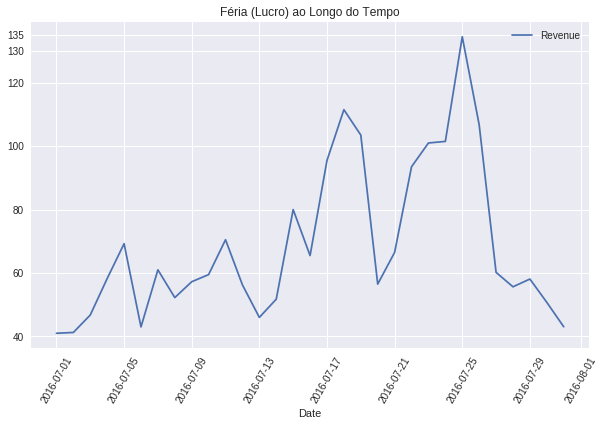

In [54]:
plt = df.plot(x='Date', y='Revenue', figsize=(10,6), fontsize=10, yticks=[40,60, 80,100, 120,130,135],rot=60,
        title='Féria (Lucro) ao Longo do Tempo')

**11) Gráfico scatter-plot leaflets x sales.**

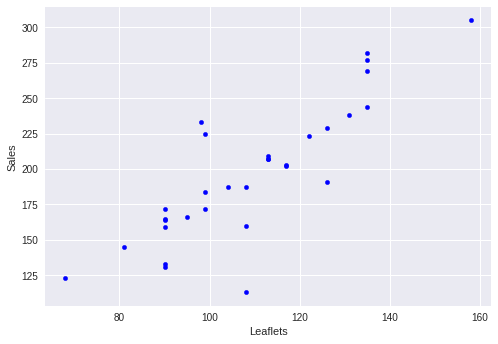

In [55]:
plt = df.plot.scatter(x='Leaflets', y='Sales', c='blue')

Podemos notar que existe uma correlação entre os dados.

**12) Histograma que da féria (revenue) com 10 bins**

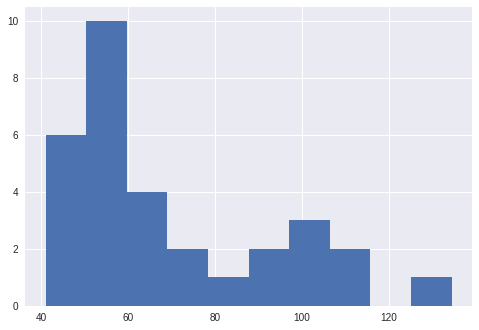

In [56]:
import matplotlib.pyplot as plt

fig = plt.figure()
axis = plt.axis()

histograma = plt.hist(df.Revenue, bins=10)

**13) Gráfico de linha que apresenta a féria por tipo de fruta ao longo do tempo.**

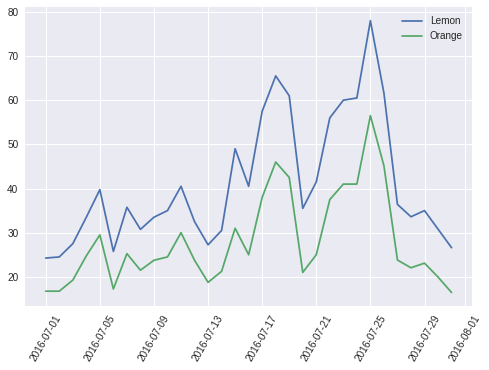

In [57]:

plt.plot(df.Date, df.Lemon *df.Price, label='Lemon')
plt.plot(df.Date, df.Orange *df.Price, label='Orange')
plt.legend()
plt.xticks(rotation=60)
plt.show()


**14) Predição de vendas a partir de temperature, leafltes e price**

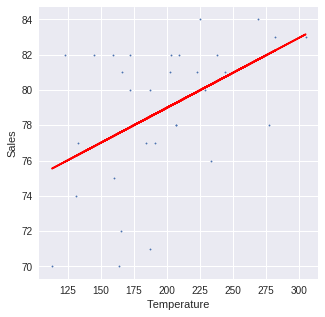

In [58]:
#@title Predição por Temperature
temp = df.Temperature.values.reshape(-1, 1)
sales = df.Sales.values.reshape(-1, 1)
reg = LinearRegression()
reg.fit(sales,temp)

plt.figure(figsize=(5, 5))
plt.scatter(sales, temp, s=2)
plt.plot(sales, reg.predict(sales), c='red')
plt.ylabel('Sales')
plt.xlabel('Temperature')
plt.show()

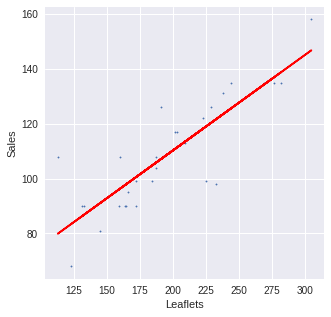

In [59]:
#@title Predição por Leaflets
panfleto = df.Leaflets.values.reshape(-1, 1)
reg = LinearRegression()
reg.fit(sales,panfleto)

plt.figure(figsize=(5, 5))
plt.scatter(sales, panfleto, s=2)
plt.plot(sales, reg.predict(sales), c='red')
plt.ylabel('Sales')
plt.xlabel('Leaflets')
plt.show()

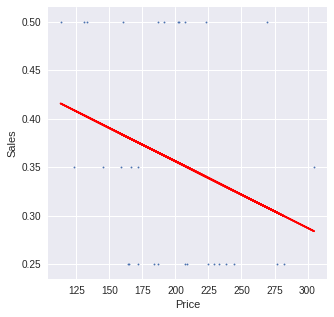

In [60]:
#@title Predição por Price
preco = df.Price.values.reshape(-1, 1)
reg = LinearRegression()
reg.fit(sales,preco)

plt.figure(figsize=(5, 5))
plt.scatter(sales, preco, s=2)
plt.plot(sales, reg.predict(sales), c='red')
plt.ylabel('Sales')
plt.xlabel('Price')
plt.show()

**15) Regressão linear predizendo vendas a partir das três variáveis juntas**

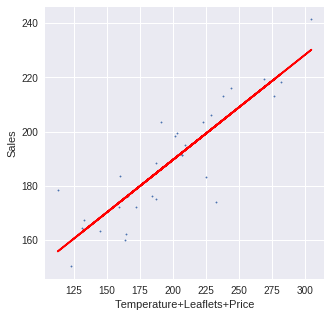

In [61]:
#@title Predição por temperature, leaflets e sales { display-mode: "form" }
multivariada = df.Temperature + df.Leaflets+ df.Price
reg = LinearRegression()
reg.fit(sales,multivariada)
plt.figure(figsize=(5, 5))
plt.scatter(sales, multivariada, s=2)
plt.plot(sales, reg.predict(sales), c='red')
plt.ylabel('Sales')
plt.xlabel('Temperature+Leaflets+Price')
plt.show()

**16) Algoritmo de regressão Linear implementada e generalizada para que ele possa ser usado para regressão multivariada**

In [0]:
#@title Classe para regressão linear implementada { display-mode: "code" }

class MyLinearRegression:
  
  def __init__(self):
    self.b0=0.0
    self.b1=0.0
    self.independente = 0.0
    self.predicto = 0.0
    
  def correlation(self):
    mediax = self.multivariada(self.independente).mean()
    mediay = np.mean(self.predicto)
    deltax = (self.multivariada(self.independente) - mediax)**2
    deltay = (self.predicto - mediay)**2
    a = np.sum((self.multivariada(self.independente) - mediax) * (self.predicto - mediay))
    b = np.sqrt(np.sum(deltax) * np.sum(deltay))
    return a/b
  
  def multivariada(self,valor):
    if isinstance(valor,pd.DataFrame) :
      variavel = list(map(sum,valor.get_values()))
    else:
      variavel = valor
    return pd.DataFrame(variavel)
  
  def fit(self):
    self.b1 = self.correlation() * self.multivariada(self.independente).std() / self.multivariada(self.predicto).std()
    self.b0 =  self.multivariada(self.independente).mean() -(self.b1 * self.multivariada(self.predicto).mean())
    
  def predict(self, X):
    """ Utilizando a função map() para somar os elementos do dataframe, para 
    o caso de utilização de regressao multivariada."""
    return self.b0 + self.b1 * pd.DataFrame(self.multivariada(X))

In [63]:
#@title 
rl = MyLinearRegression()
rl.independente = df[['Leaflets','Temperature','Price']]
rl.predicto = df.Sales.values.reshape(-1, 1)
rl.correlation()
rl.fit()

print("correlação:",rl.correlation())
print("B0:",rl.b0)
print("B1",rl.b1)






correlação: 0    0.872994
dtype: float64
B0: 0    112.146911
dtype: float64
B1 0    0.386985
dtype: float64


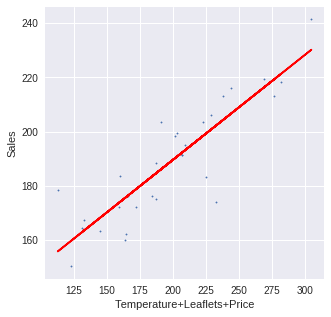

In [64]:
#@title representação gráfica da correlação implementada { display-mode: "form" }
rl = MyLinearRegression()
rl.independente = df[['Temperature','Leaflets','Price']]
rl.predicto = df.Sales.values.reshape(-1,1)
rl.fit()
plt.figure(figsize=(5, 5))
plt.scatter(rl.predicto, rl.multivariada(rl.independente), s=2)
plt.plot(rl.predicto, rl.predict(sales), c='red')
plt.ylabel('Sales')
plt.xlabel('Temperature+Leaflets+Price')
plt.show()

**17) Regressão no conjunto de  pesos e alturas de pessoas. Comparação entre os resultados obtidos através da minha implementação particular do algoritmo com o do Scikit Learning.**

Algoritmo Implementado b0: [-159.09158431] b1: [1.37814958]
Scikit Learnig b0: [-159.09158431] b1: [[1.37814958]]


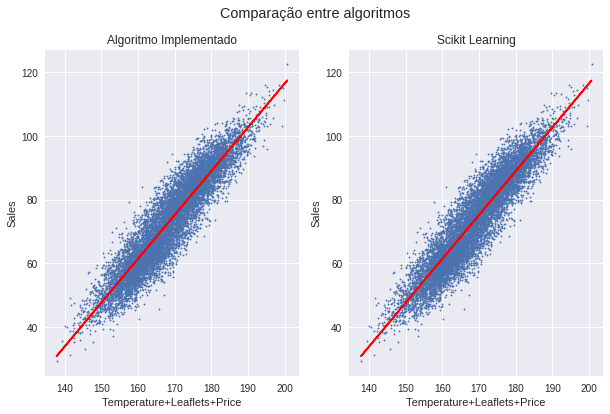

In [65]:
pa = pd.read_csv('https://s3.amazonaws.com/aulas-fiap/measures.csv', sep=',')

altura = pa['Height (cm)'].values.reshape(-1, 1)
peso = pa['Weight (kg)'].values.reshape(-1, 1)

rg = LinearRegression()
rg.fit(altura, peso)

gr = MyLinearRegression()
gr.independente = peso
gr.predicto = altura
gr.fit()

fig, axes = plt.subplots(ncols=2, figsize = (10,6))

axes[0].scatter(altura, gr.multivariada(peso), s=2)
axes[0].plot(altura, gr.predict(altura), c='red')

axes[1].scatter(altura, peso, s=2)
axes[1].plot(altura, rg.predict(altura), c='red')

fig.suptitle("Comparação entre algoritmos")
axes[0].set_title('Algoritmo Implementado')
axes[1].set_title('Scikit Learning')
axes[0].set_ylabel("Sales")
axes[1].set_ylabel("Sales")
axes[0].set_xlabel("Temperature+Leaflets+Price")
axes[1].set_xlabel("Temperature+Leaflets+Price")

fig.show()

print('Algoritmo Implementado b0: {} b1: {}'.format(gr.b0.values, gr.b1.values))
print('Scikit Learnig b0: {} b1: {}'.format(rg.intercept_, rg.coef_))
